In [6]:
# cd ..

In [7]:
!pwd

/home/metabrix_project_user/course22p2


In [8]:
import torch
import miniai

In [9]:
import torch
from torch import nn

from torch.utils.data import default_collate
from typing import Mapping

from miniai.training import *
from miniai.datasets import *

In [10]:
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, numpy as np
import pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
from torch import tensor

from torch.utils.data import DataLoader
from typing import Mapping


In [11]:
mpl.rcParams['image.cmap'] = 'gray'

In [12]:
path_data = Path('data')
path_gz = path_data/'mnist.pkl.gz'
with gzip.open(path_gz, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
    
x_train, y_train, x_valid, y_valid = map(tensor, [x_train, y_train, x_valid, y_valid])

In [33]:
# gz = gzip.open(path_gz) 
# gz.close()

In [34]:
x_train.shape

torch.Size([50000, 784])

In [35]:
x_imgs = x_train.view(-1, 28, 28)
xv_imgs = x_valid.view(-1, 28, 28) 

In [36]:
x_reshaped = x_train.reshape(-1, 28, 28)

In [37]:
np.unique(x_imgs == x_reshaped)

array([ True])

In [38]:
mpl.rcParams['figure.dpi'] = 30

<Axes: >

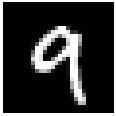

In [39]:
im3 = x_imgs[110]
show_image(im3)

In [40]:
top_edge = tensor([[-1, -1, -1],
                   [0, 0, 0],
                   [1, 1, 1]]).float()

<Axes: >

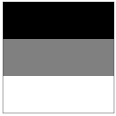

In [41]:
show_image(top_edge, noframe=False)

In [42]:
df = pd.DataFrame(im3[:13, :23])
df.style.format(precision=2).set_properties(**{'font-size':'7pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.52,0.99,0.99,0.24,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.32,0.88,0.99,0.99,0.99,0.89,0.17,0.20,0.03,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.58,0.99,0.99,0.84,0.43,0.80,0.99,0.99,0.99,0.68,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.47,0.95,0.99,0.64,0.05,0.00,0.04,0.83,0.99,0.99,0.68,0.00,0.00,0.00


In [43]:
top_edge.shape

torch.Size([3, 3])

In [44]:
im3.shape, im3[4:7, 13:16].shape

(torch.Size([28, 28]), torch.Size([3, 3]))

In [45]:
(im3[4:7, 13:16] * top_edge).sum()

tensor(2.5039)

In [46]:
normalized_top_edge = (top_edge - torch.min(top_edge)) / (torch.max(top_edge) - torch.min(top_edge))

<Axes: >

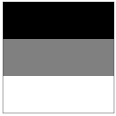

In [47]:
show_image(normalized_top_edge, noframe=False)

In [48]:
torch.min(top_edge)

tensor(-1.)

In [49]:
(im3[7:10,13:16] * top_edge).sum()

tensor(-2.8750)

In [192]:
(im3[7:10,13:16]* top_edge)#.sum(axis=0)

tensor([[-0.9883, -0.9883, -0.9883],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0547,  0.0000,  0.0352]])

In [50]:
def apply_kernel(row, col, kernel):
    return (im3[row-1:row+2, col-1:col+2] * kernel).sum()

In [51]:
apply_kernel(8, 14, top_edge)

tensor(-2.8750)

In [52]:
# get coordinates over which to convolute

[[(i,j) for j in range(5)] for i in range(5)]

[[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)],
 [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)],
 [(2, 0), (2, 1), (2, 2), (2, 3), (2, 4)],
 [(3, 0), (3, 1), (3, 2), (3, 3), (3, 4)],
 [(4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]]

<Axes: >

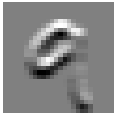

In [53]:
rng = range(1, 27)
top_edge3 = tensor([[apply_kernel(i, j, top_edge) for j in rng] for i in rng])

show_image(top_edge3)

In [54]:
left_edge = tensor([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]]).float()

<Axes: >

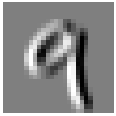

In [55]:
left_edge9 = tensor([[apply_kernel(i, j, left_edge) for j in rng] for i in rng])

show_image(left_edge9)

In [56]:
right_edge = tensor([[1, 0, -1],
                    [1, 0, -1],
                    [1, 0, -1]]).float()

<Axes: >

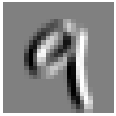

In [57]:
right_edge9 = tensor([[apply_kernel(i, j, right_edge) for j in rng] for i in rng])

show_image(right_edge9)

<Axes: >

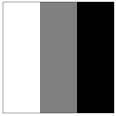

In [58]:
show_image(right_edge, noframe=False)

<Axes: >

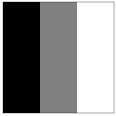

In [59]:
show_image(left_edge, noframe=False)

<Axes: >

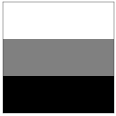

In [60]:
bottom_edge = tensor([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]]).float()
show_image(bottom_edge, noframe=False)

<Axes: >

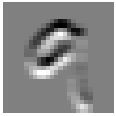

In [61]:
bottom_edge9 = tensor([[apply_kernel(i, j, bottom_edge) for j in rng] for i in rng])

show_image(bottom_edge9)

In [62]:
import torch
import torch.nn.functional as F

In [63]:
im3.shape

torch.Size([28, 28])

In [64]:
inp = im3[None, None, :, :].float()
inp_unf = F.unfold(inp, (3, 3))[0]
inp_unf2 = F.unfold(inp, 3)[0]

In [79]:
inp.shape, inp_unf.shape, inp_unf2.shape

(torch.Size([1, 1, 28, 28]), torch.Size([9, 676]), torch.Size([9, 676]))

In [66]:
torch.allclose(inp_unf, inp_unf2)

True

In [67]:
left_edge.shape

torch.Size([3, 3])

In [68]:
w = left_edge.view(-1)
w.shape

torch.Size([9])

In [69]:
out_unf = w@inp_unf
out_unf.shape

torch.Size([676])

<Axes: >

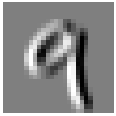

In [70]:
out = out_unf.view(26, -1)
show_image(out)

<Axes: >

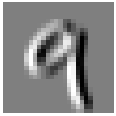

In [71]:
left_edge9 = tensor([[apply_kernel(i, j, left_edge) for j in rng] for i in rng])

show_image(left_edge9)

In [72]:
torch.allclose(out, left_edge9)

True

In [73]:
out.shape, left_edge9.shape

(torch.Size([26, 26]), torch.Size([26, 26]))

In [74]:
inp.shape

torch.Size([1, 1, 28, 28])

In [75]:
left_edge.shape

torch.Size([3, 3])

In [76]:
left_edge[None, None].shape

torch.Size([1, 1, 3, 3])

In [78]:
out_conv = F.conv2d(inp, left_edge[None, None])

In [81]:
hello=1
del hello

In [90]:
xb = x_imgs[:16]
xb.shape

torch.Size([16, 28, 28])

In [91]:
xb = xb[:, None]
xb.shape

torch.Size([16, 1, 28, 28])

<Axes: >

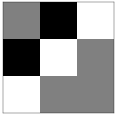

In [94]:
diag1_edge = tensor([[0, -1, 1],
                     [-1, 1, 0],
                     [1, 0, 0]]).float()

show_image(diag1_edge, noframe=False)

<Axes: >

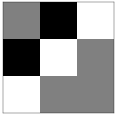

In [95]:
diag2_edge = tensor([[0, -1, 1],
                     [-1, 1, 0],
                     [1, 0, 0]]).float()

show_image(diag2_edge, noframe=False)

In [97]:
edge_kernels = torch.stack([left_edge, top_edge, diag1_edge, diag2_edge])[:, None]
edge_kernels.shape

torch.Size([4, 1, 3, 3])

In [98]:
batch_features = F.conv2d(xb, edge_kernels)

In [99]:
batch_features.shape

torch.Size([16, 4, 26, 26])

In [102]:
xb.shape

torch.Size([16, 1, 28, 28])

In [108]:
torch.allclose(xb[1][0], xb[1, 0])

True

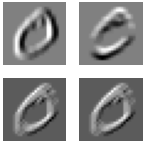

In [109]:
show_images([batch_features[1, i] for i in range(4)])

In [110]:
x_train.shape

torch.Size([50000, 784])

In [113]:
n, m = x_train.shape

In [118]:
c = y_train.max()+1
c

tensor(10)

In [119]:
nh = 50

In [120]:
model = nn.Sequential(
    nn.Linear(m, nh),
    nn.ReLU(),
    nn.Linear(nh, c)
)

In [121]:
broken_cnn = nn.Sequential(
    nn.Conv2d(1, 30, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(30, 10, kernel_size=3, padding=1)
)

In [122]:
broken_cnn(xb).shape

torch.Size([16, 10, 28, 28])

In [135]:
def conv(ni, nf, ks=3, stride=2, act=True):
    res = nn.Conv2d(ni, nf, kernel_size=ks, stride=stride, padding=ks//2)
    if act: res = nn.Sequential(res, nn.ReLU())
#     print(res.shape)
    return res

In [136]:
xb.shape

torch.Size([16, 1, 28, 28])

In [137]:
simple_cnn = nn.Sequential(
    conv(1, 4),                # (28 - 3 + 2) // 2 + 1 = 14x14
    conv(4, 8),                # (14 - 3 + 2) // 2 + 1 = 7x7
    conv(8, 16),               # (7 - 3 + 2) // 2 + 1  = 4x4
    conv(16, 16),              # (4 - 3 + 2) // 2 + 1  = 2x2
    conv(16, 10, act=False),   # (2 - 3 + 2) // 2 + 1 =  1x1 
    nn.Flatten(),
)

In [138]:
simple_cnn(xb).shape

torch.Size([16, 10])

In [139]:
x_imgs = x_train.view(-1, 1, 28, 28)
xv_imgs = x_valid.view(-1, 1, 28, 28)
train_ds, valid_ds = Dataset(x_imgs, y_train), Dataset(xv_imgs, y_valid)

In [154]:
next(iter(train_ds))[0].shape

torch.Size([1, 28, 28])

In [164]:
def_device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [157]:
device

'cuda'

In [165]:
def to_device(x, device=def_device):
    if isinstance(x, torch.Tensor): return x.to(device)
    if isinstance(x, Mapping): return {k: v.to(device) for k, v in x.items()}
    return type(x)(to_device(o, device) for o in x)

In [166]:
def collate_device(b):
    return to_device(default_collate(b))

In [160]:
default_collate??

In [161]:
from torch import optim

In [162]:
bs = 256
lr = 0.4

train_dl, valid_dl = get_dls(train_ds, valid_ds, bs, collate_fn=collate_device)
opt = optim.SGD(simple_cnn.parameters(), lr=lr)

In [167]:
loss, acc = fit(5, simple_cnn.to(device), F.cross_entropy, opt, train_dl, valid_dl)

0 0.5506280636787415 0.8256
1 0.16779471454620362 0.9506000007629395
2 0.1200051762342453 0.9646000007629395
3 0.11528502407073975 0.966000000667572
4 0.1559745602607727 0.9546000008583069


In [168]:
opt = optim.SGD(simple_cnn.parameters(), lr = lr/4)
loss, acc = fit(5, simple_cnn.to(def_device), F.cross_entropy, opt, train_dl, valid_dl)

0 0.08358498106002808 0.9758000008583069
1 0.08049975099563599 0.976599999332428
2 0.08218975627422333 0.9770000008583068
3 0.08296559610366822 0.9778000008583069
4 0.08704531698226929 0.9744999993324279


In [171]:
simple_cnn[0][0]

Conv2d(1, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))

In [172]:
conv1 = simple_cnn[0][0]

In [176]:
conv1.weight.shape

torch.Size([4, 1, 3, 3])

In [179]:
conv2 = simple_cnn[1][0]

In [181]:
conv2.weight.shape

torch.Size([8, 4, 3, 3])

In [185]:
simple_cnn[3][0].weight.shape

torch.Size([16, 16, 3, 3])